In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [19]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [21]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

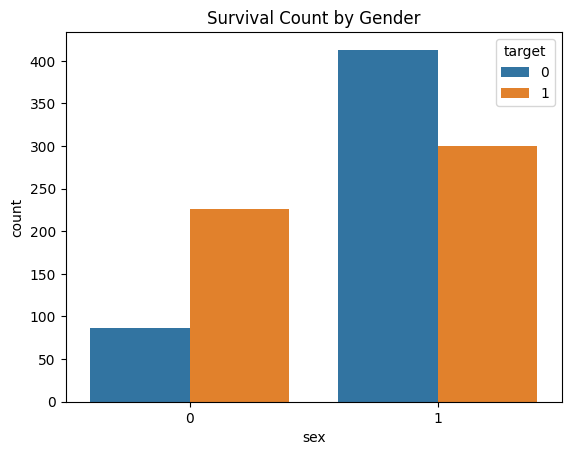

In [23]:
sns.countplot(x='sex', hue='target', data=df)
plt.title('Survival Count by Gender')
plt.show()

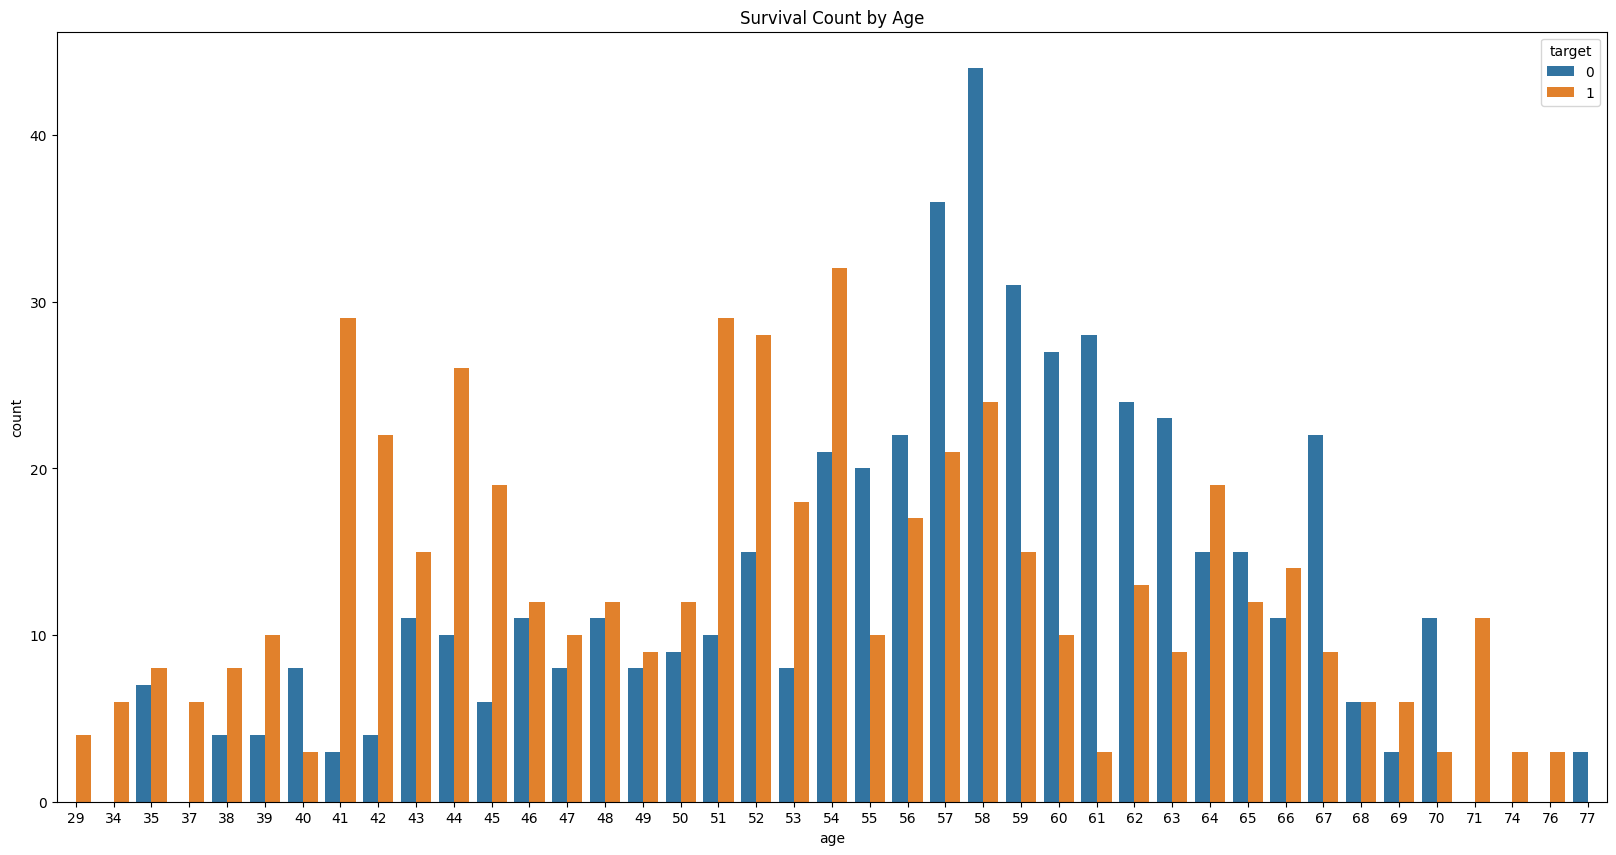

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='age', hue='target', data=df)
plt.title('Survival Count by Age')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

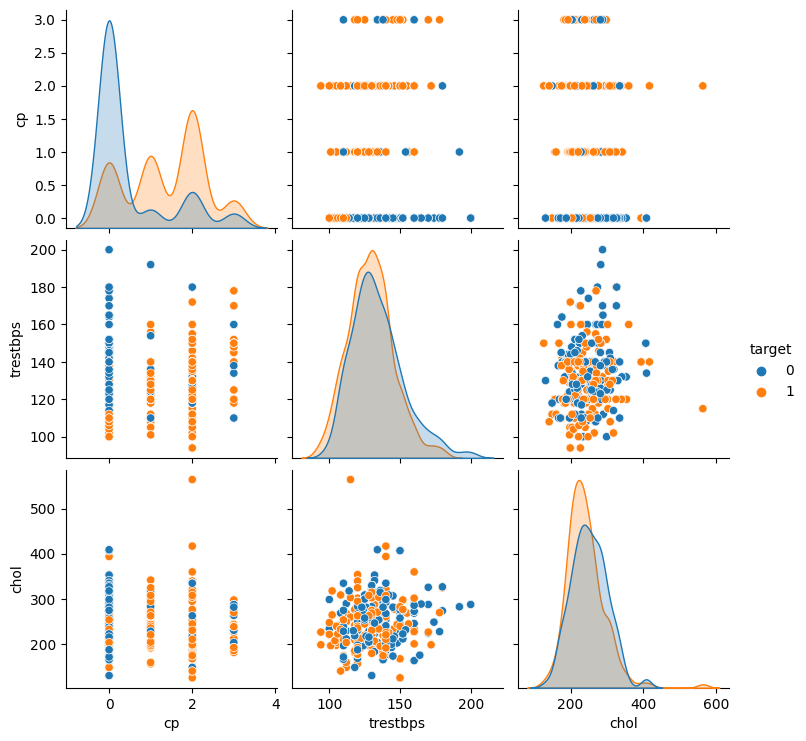

In [25]:
sns.pairplot(df, hue='target', vars=['cp', 'trestbps', 'chol'])
plt.show()



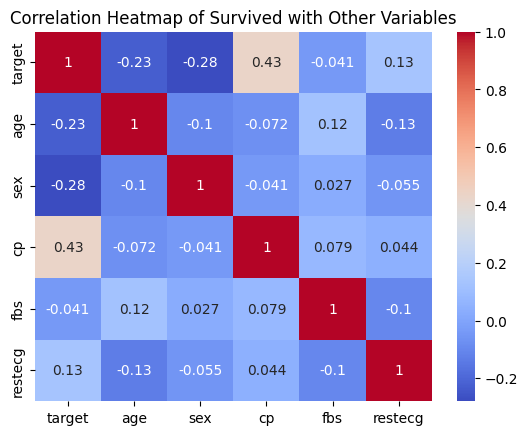

In [26]:
corr_matrix = df[['target', 'age', 'sex', 'cp', 'fbs', 'restecg']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Survived with Other Variables')
plt.show()

Model Import

In [1]:
pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 67.0 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.3 which is incompatible.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.9.2 which is incompatible.
Note: y

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [9]:
import sklearn
print(sklearn.__version__)

1.5.2


In [10]:
# Select the features
features = ['age', 'sex', 'cp', 'fbs', 'restecg']

# Select the target column
target = 'target'

# Extract features (X) and target (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values (optional, but recommended for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Predicting with Linear Regression

In [11]:
# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lr = lin_reg.predict(X_test_scaled)

# Convert the continuous predictions into binary outcomes
y_pred_lr_binary = np.round(y_pred_lr)

# Evaluate the model (Accuracy score)
lr_accuracy = accuracy_score(y_test, y_pred_lr_binary)
print(f'Linear Regression Accuracy: {lr_accuracy:.4f}')


Linear Regression Accuracy: 0.7902


Predicting with Naive Bayes

In [12]:
# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_nb = nb.predict(X_test_scaled)

# Evaluate the model (Accuracy score)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {nb_accuracy:.4f}')


Naive Bayes Accuracy: 0.7854


In [13]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the model (Accuracy score)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')


Random Forest Accuracy: 0.9463


In [14]:
# Train K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model (Accuracy score)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}')


K-Nearest Neighbors Accuracy: 0.8585


In [15]:
# Print all accuracies
print(f'Linear Regression Accuracy: {lr_accuracy:.4f}')
print(f'Naive Bayes Accuracy: {nb_accuracy:.4f}')
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}')


Linear Regression Accuracy: 0.7902
Naive Bayes Accuracy: 0.7854
Random Forest Accuracy: 0.9463
K-Nearest Neighbors Accuracy: 0.8585


In [16]:
import joblib

# Assuming your trained model is in a variable called 'model'
joblib.dump(rf, 'heart_disease_model.pkl')


['heart_disease_model.pkl']